In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open("annotations/person_keypoints_train2017.json") as f:
    js = json.load(f)

In [3]:
annotations = js['annotations']

In [4]:
filtered = list(filter(lambda x : x['num_keypoints'] > 10, annotations))

In [5]:
print(len(filtered))
filtered[0]

89636


{'segmentation': [[187.03,
   472.97,
   192.43,
   350.81,
   181.62,
   335.68,
   182.7,
   317.3,
   180.54,
   301.08,
   193.51,
   293.51,
   195.68,
   268.65,
   178.38,
   248.11,
   182.7,
   216.76,
   194.59,
   194.05,
   210.81,
   171.35,
   200,
   141.08,
   230.27,
   120.54,
   260.54,
   134.59,
   257.3,
   177.84,
   246.49,
   186.49,
   257.3,
   199.46,
   254.05,
   253.51,
   276.76,
   281.62,
   285.41,
   275.14,
   292.97,
   275.14,
   275.68,
   291.35,
   252.97,
   288.11,
   286.49,
   380,
   288.65,
   417.84,
   243.24,
   475.14,
   195.68,
   475.14]],
 'num_keypoints': 13,
 'area': 26215.66095,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  252,
  156,
  2,
  0,
  0,
  0,
  248,
  153,
  2,
  198,
  193,
  2,
  243,
  196,
  2,
  182,
  245,
  2,
  244,
  263,
  2,
  0,
  0,
  0,
  276,
  285,
  2,
  197,
  298,
  2,
  228,
  297,
  2,
  208,
  398,
  2,
  266,
  399,
  2,
  205,
  475,
  2,
  215,
  453,
  2],
 'image_id': 209468

In [6]:
! ls train2017 | wc -l

  118287


In [116]:
! tail dlc_csv/CollectedData_daniel.csv

labeled-data,baseline,val_cropped_0022297.jpg,131,101,146,101,139,119,129,70,105,129,79,108,70,169,101,180,155,125,182,167,151,257,130,208,115,202,123,232,170,178,146,249,145,225
labeled-data,baseline,val_cropped_0022298.jpg,111,88,121,87,116,94,115,70,119,111,98,110,95,141,133,132,137,104,159,135,149,125,111,147,70,137,100,174,141,133,139,166,106,159
labeled-data,baseline,val_cropped_0022299.jpg,74,80,97,80,72,101,87,53,104,132,70,156,132,226,78,296,146,140,198,215,107,317,241,265,115,251,76,309,110,227,81,315,216,340
labeled-data,baseline,val_cropped_0022300.jpg,130,93,143,94,146,113,122,70,134,152,78,147,95,227,70,308,181,136,205,225,217,298,175,249,119,222,120,292,216,198,183,300,254,263
labeled-data,baseline,val_cropped_0022301.jpg,82,95,89,97,84,107,84,67,109,120,88,113,91,139,93,181,141,97,153,138,136,186,110,162,70,132,83,181,138,142,106,176,108,179
labeled-data,baseline,val_cropped_0022302.jpg,107,88,139,90,126,102,124,70,125,147,70,143,117,221,125,278,173,121,211,167,174,233,

In [68]:
import matplotlib.pyplot as plt
import cv2 as cv

from tqdm import tqdm
for i in tqdm(range(len(filtered))):
    ann = filtered[i]
    bbox = [int(b) for b in ann['bbox']]
    x, y, w, h = bbox
    filename = str(ann['image_id']).rjust(12, '0') + ".jpg"
    im = cv.imread(f"train2017/{filename}")
    im_cropped = im[y : y + h, x : x + w]
    new_filename = "coco_train_cropped_" + str(i).rjust(12, '0') + ".jpg"
    cv.imwrite(f"train2017_cropped/{new_filename}", im_cropped)

100%|████████████████████████████████████████████████████████| 89636/89636 [09:39<00:00, 154.72it/s]


In [7]:
human_landmarks = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]
monkey_landmarks = ["right_eye", "left_eye", "nose", "head", "neck", "right_shoulder", "right_elbow", "right_wrist", "left_shoulder", "left_elbow", "left_wrist", "hip", "right_knee", "right_ankle", "left_knee", "left_ankle", "tail"]

In [8]:
def get_monkey_annotations(ann):
    landmarks = {}
    keypoints = ann['keypoints']
    bbox = ann['bbox']
    x, y, w, h = [int(b) for b in bbox]
    for i in range(len(human_landmarks)):
        if keypoints[i * 3 + 2] == 0:
            landmarks[human_landmarks[i]] = None
        else:
            landmarks[human_landmarks[i]] = keypoints[i * 3] - x, keypoints[i * 3 + 1] - y
    output = []
    for land in monkey_landmarks:
        if (land == "neck"):
            if (landmarks["left_shoulder"] is not None and landmarks['right_shoulder'] is not None and landmarks["nose"] is not None):
                x = np.mean([landmarks["left_shoulder"][0], landmarks["right_shoulder"][0], landmarks["nose"][0]])
                y = np.mean([landmarks["left_shoulder"][1], landmarks["right_shoulder"][1], landmarks["nose"][1]])
                output.append(int(x))
                output.append(int(y))
            else:
                output.append("")
                output.append("")
        elif (land == "hip"):
            if landmarks["left_hip"] is not None and landmarks['right_hip'] is not None:
                x = np.mean([landmarks["left_hip"][0], landmarks["right_hip"][0]])
                y = np.mean([landmarks["left_hip"][1], landmarks["right_hip"][1]])
                output.append(int(x))
                output.append(int(y))
            else:
                output.append("")
                output.append("")
        elif (land == "head" or land == "tail" or landmarks[land] is None):
            output.append("")
            output.append("")
        else:
            output.append(int(landmarks[land][0]))
            output.append(int(landmarks[land][1]))
    return output

In [119]:
with open("dlc_csv/CollectedData_daniel.csv", "a") as f:
    for i in tqdm(range(len(filtered))):
        ann = filtered[i]
        monkey = get_monkey_annotations(ann)
        new_filename = "coco_train_cropped_" + str(i).rjust(12, '0') + ".jpg,"
        csv_row = "labeled-data,baseline," + new_filename + ",".join([str(monk) for monk in monkey])
        f.write(csv_row + "\n")

100%|██████████████████████████████████████████████████████| 89636/89636 [00:05<00:00, 16902.69it/s]


In [9]:
import pandas as pd

df = pd.read_csv("dlc_csv/CollectedData_daniel.csv", index_col=[0, 1, 2], header=[0, 1, 2])
df

scorer                                                    daniel         \
bodyparts                                                   Nose          
coords                                                         x      y   
labeled-data baseline train_cropped_0000000.jpg             92.0  153.0   
                      train_cropped_0000001.jpg             97.0  105.0   
                      train_cropped_0000002.jpg             88.0   87.0   
                      train_cropped_0000003.jpg            141.0   87.0   
                      train_cropped_0000004.jpg            105.0   95.0   
...                                                          ...    ...   
                      coco_train_cropped_000000089631.jpg   92.0   24.0   
                      coco_train_cropped_000000089632.jpg   15.0    8.0   
                      coco_train_cropped_000000089633.jpg    NaN    NaN   
                      coco_train_cropped_000000089634.jpg   16.0   10.0   
                      coco_train_cropped_000000089635.jpg    NaN    NaN   

scorer                                                                     \
bodyparts                                                 Left eye          
coords                                                           x      y   
labeled-data baseline train_cropped_0000000.jpg              127.0  148.0   
                      train_cropped_0000001.jpg              120.0  104.0   
                      train_cropped_0000002.jpg               94.0   86.0   
                      train_cropped_0000003.jpg              150.0   89.0   
                      train_cropped_0000004.jpg              115.0   90.0   
...                                                            ...    ...   
                      coco_train_cropped_000000089631.jpg     99.0   25.0   
                      coco_train_cropped_000000089632.jpg     19.0    9.0   
                      coco_train_cropped_000000089633.jpg      NaN    NaN   
                      coco_train_cropped_000000089634.jpg     19.0   10.0   
                      coco_train_cropped_000000089635.jpg     15.0    9.0   

scorer                                                                      \
bodyparts                                                 Right eye          
coords                                                            x      y   
labeled-data baseline train_cropped_0000000.jpg               109.0  177.0   
                      train_cropped_0000001.jpg               104.0  145.0   
                      train_cropped_0000002.jpg                90.0   94.0   
                      train_cropped_0000003.jpg               140.0  100.0   
                      train_cropped_0000004.jpg               111.0  109.0   
...                                                             ...    ...   
                      coco_train_cropped_000000089631.jpg      93.0   29.0   
                      coco_train_cropped_000000089632.jpg      17.0   10.0   
                      coco_train_cropped_000000089633.jpg       NaN    NaN   
                      coco_train_cropped_000000089634.jpg      17.0   11.0   
                      coco_train_cropped_000000089635.jpg      12.0   12.0   

scorer                                                                         \
bodyparts                                                   Head         Neck   
coords                                                         x     y      x   
labeled-data baseline train_cropped_0000000.jpg             70.0  70.0  212.0   
                      train_cropped_0000001.jpg            109.0  70.0  112.0   
                      train_cropped_0000002.jpg             94.0  70.0  113.0   
                      train_cropped_0000003.jpg            152.0  70.0  154.0   
                      train_cropped_0000004.jpg            104.0  77.0  144.0   
...                                                          ...   ...    ...   
                      coco_train_cropped_0000000

In [5]:
df.to_hdf("dlc_csv/CollectedData_daniel.h5", mode="w", key="label")

In [10]:
import matplotlib.cm
import matplotlib.pyplot as plt
import cv2 as cv
import math

def visualize(img, row):
    edges = [(0, 2), (1, 2), (3, 4), (4, 5), (4, 8), (5, 6), (6, 7), (8, 9), (9, 10), 
            (4, 11), (11, 12), (11, 14), (11, 16), (12, 13), (14, 15)]
    cmap = matplotlib.cm.get_cmap('Spectral')
    colors = [[255 * color for color in cmap(i / len(edges))] for i in range(len(edges))]
    width = 2
    for color, edge in zip(colors, edges):
        start_idx, end_idx = edge
        start = row[start_idx * 2], row[start_idx * 2 + 1]
        end = row[end_idx * 2], row[end_idx * 2 + 1]
        if math.isnan(start[0]) or math.isnan(end[0]):
            continue
        start = [int(s) for s in start]
        end = [int(e) for e in end]
        img = cv.line(img, start, end, color, width)
    plt.imshow(img)
    plt.show()

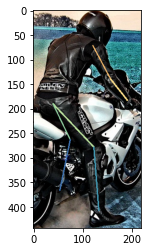

In [14]:
idx = 2
filename = "coco_train_cropped_" + str(idx).rjust(12, "0") + ".jpg"
img = cv.imread("train2017_cropped/" + filename)
row = df.iloc[89223 + idx, :]
visualize(img, row)

1